In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
# blob/bucket/sys -> folder

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head(200)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2604-IJPDU,Female,0,Yes,No,20,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,96.55,1901.65,No
196,9178-JHUVJ,Male,0,Yes,Yes,24,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.10,587.4,No
197,6168-YBYNP,Male,0,No,No,59,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.35,6519.75,No
198,7255-SSFBC,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.25,8041.65,No


In [ ]:
# pd.set_option("display.max_rows",None)

In [ ]:
# df.head(200)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
#basic analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
#label encoding
df['gender'] = df['gender'].map({'Female':0,"Male":1})
df['Churn'] = df['Churn'].map({"No":0, "Yes":1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#feature selection
numerical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

  #string - numeric
for col in numerical_features:
  if df[col].dtype == "object":
    df[col] = pd.factorize(df[col])[0] #[[]]

numerical_features = [f for f in numerical_features if f in df.columns]

X = df[numerical_features]
y = df['Churn']

#perform RFE
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5) #top 5
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(n_estimators=200, random_state=42),
    n_features_to_select=5)

In [ ]:
selected_features = [feature for feature, selected in
                     zip(numerical_features,rfe.support_) if selected]


selected_features

['tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges']

In [ ]:
#model -> neural network

X = df[selected_features]
y = df['Churn']

In [ ]:
X.head(2)
#googd thinf model? -terrible

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,1,0,0,29.85,29.85
1,34,1,1,56.95,1889.50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
import pickle

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#save -> why save?
with open('scaler.pkl', 'wb') as f:
  pickle.dump(scaler,f)

In [ ]:
def create_model():
  model = models.Sequential([
      layers.Dense(64, activation='relu',
                   input_shape=(5,)),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics = ['accuracy'])
  return model

In [ ]:
initial_model = create_model()
initial_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = initial_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.20
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7134 - loss: 0.5753 - val_accuracy: 0.7369 - val_loss: 0.4414
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7589 - loss: 0.4486 - val_accuracy: 0.7929 - val_loss: 0.4370
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7739 - loss: 0.4509 - val_accuracy: 0.8027 - val_loss: 0.4220
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.4395 - val_accuracy: 0.8027 - val_loss: 0.4233
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.4359 - val_accuracy: 0.8089 - val_loss: 0.4130
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4276 - val_accuracy: 0.7973 - val_loss: 0.4191
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4234 - val_accuracy: 0.8062 - val_loss: 0.4180
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7918 - loss: 0.4280 - val_accuracy: 0.

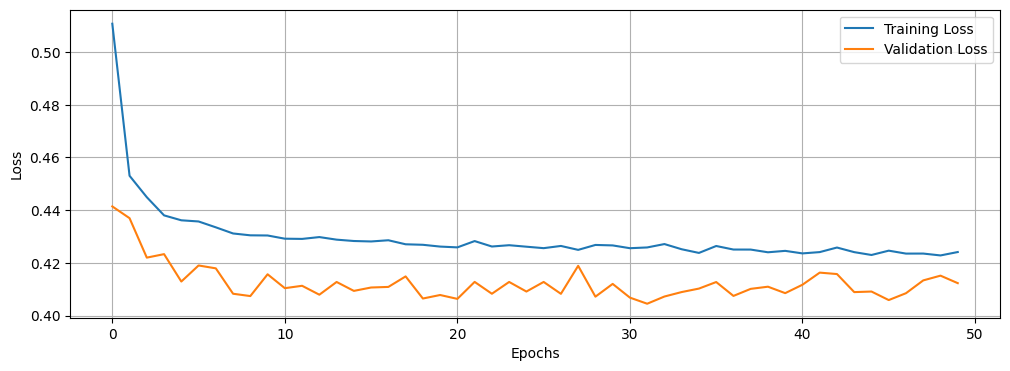

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

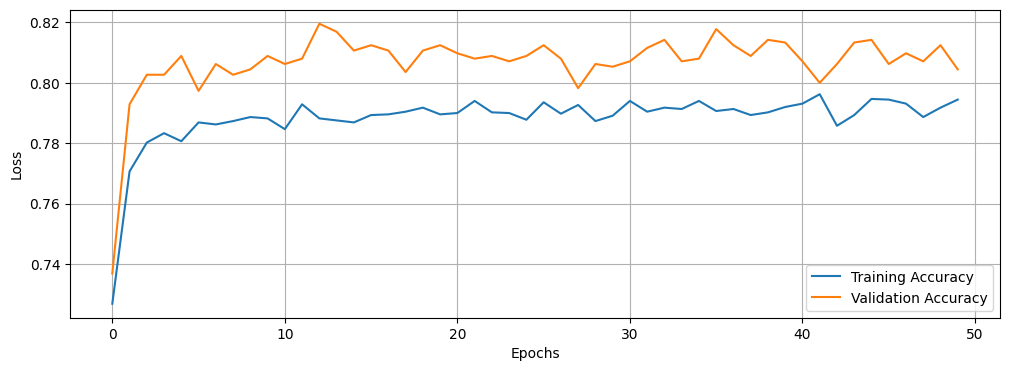

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [ ]:
initial_model.save("initial_model.h5") #SAved the model

with open('selected_features.pkl','wb') as f:
  pickle.dump(selected_features, f)

In [ ]:
#model saved, features, scaler saved ->

In [ ]:
def load_model_components():
  #your own model is being loaded here
  model = tf.keras.models.load_model("initial_model.h5")

  #your own scaler is being laoided here
  with open("scaler.pkl","rb") as f:
    scaler = pickle.load(f)

  with open("selected_features.pkl","rb") as f:
    selected_features = pickle.load(f)


  return model, scaler, selected_features

In [ ]:
def predict_Churn(*args):
  model, scaler, selected_features =load_model_components()

  input_data = pd.DataFrame([[34,1,1,56.95,1889.50]],columns=selected_features)
  input_scaled = scaler.transform(input_data)
  prediction = model.predict(input_scaled)[0][0]
  probability = float(prediction)
  churn_status = "Yes" if probability > 0.5 else "No"
  return {
      "Churn Probbaility": probability,
      "Will Churn?":churn_status
  }

In [ ]:
predict_Churn()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


{'Churn Probbaility': 0.053564928472042084, 'Will Churn?': 'No'}

In [ ]:
df[selected_features].head(2)

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,1,0,0,29.85,29.85
1,34,1,1,56.95,1889.50


In [ ]:
y.head(2)

,Churn
0,0
1,0


In [ ]:
#Demo code for horizontal and vertical edge kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

In [ ]:
def detect_edges(image_path):
  img = Image.open(image_path).convert("L")
  img_array = np.array(img)

  horizontal_kernel = np.array([[-1, -1, -1],
                                [0,0,0],
                                [1,1,1]])

  vertical_kernel = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]])

  horizontal_edges = convolve2d(img_array, horizontal_kernel, mode='same',boundary='symm')
  vertical_edges = convolve2d(img_array, vertical_kernel, mode='same',boundary='symm')
  horizontal_edges = (horizontal_edges - horizontal_edges.min()) / (horizontal_edges.max() - horizontal_edges.min())
  vertical_edges = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())

  return img_array, horizontal_edges, vertical_edges

In [ ]:
# from google.colab import files
# files.upload()

(Text(0.5, 1.0, 'Vertical Edges'),
 (np.float64(-0.5), np.float64(1999.5), np.float64(1499.5), np.float64(-0.5)))

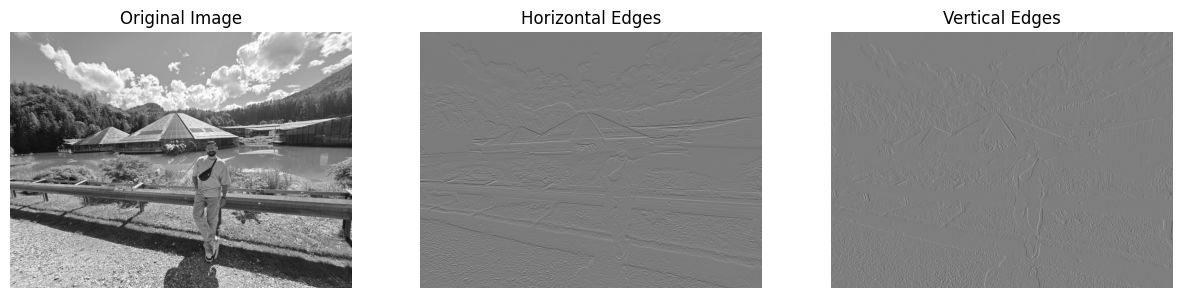

In [ ]:
image_path = "/content/d3c8388d-799a-4843-a6f8-b7d18519c713.JPG"

original, horizontal, vertical = detect_edges(image_path)

plt.figure(figsize=(15,5))

plt.subplot(131), plt.imshow(original, cmap='gray')
plt.title("Original Image"), plt.axis('off')

plt.subplot(132), plt.imshow(horizontal, cmap='gray')
plt.title("Horizontal Edges"), plt.axis('off')

plt.subplot(133), plt.imshow(vertical, cmap='gray')
plt.title("Vertical Edges"), plt.axis('off')

In [ ]:
#implement CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images[8]
#0-255.   0-1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 230,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 255,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,
        254, 254, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,
        239, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        113, 254, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         83, 254, 245,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         79, 254, 246,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 214, 254, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 241,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 240,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 144, 254,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 230, 247,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
#normalized the pixes range initially -0-255 is 0-1
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
train_images[8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

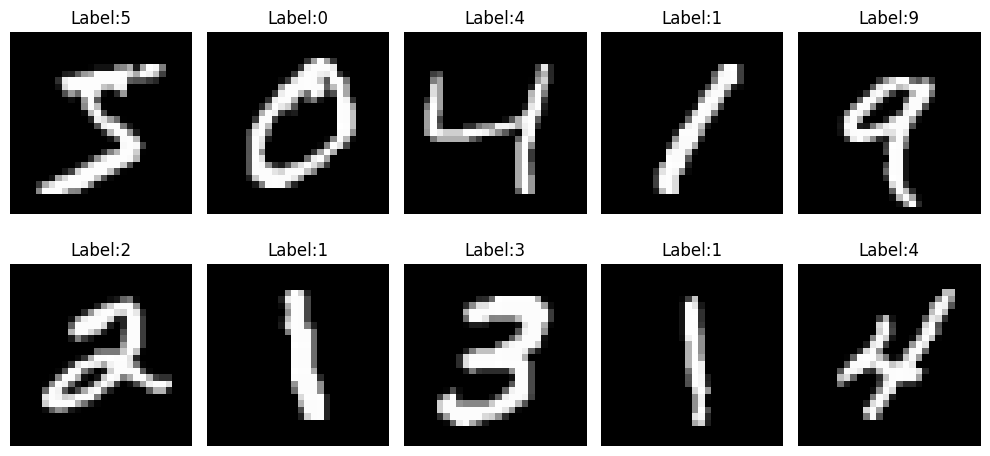

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  img = train_images[i]
  plt.imshow(img, cmap='gray')
  plt.title(f"Label:{train_labels[i]}")
  plt.axis('off')
plt.tight_layout()

In [ ]:
# image - one, 3  all tehe data -1, 28,28,1 -> image - 28.28,2
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [ ]:
#one hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
#random - model you fix this -> hyperparamerter tuning
def create_model():
  model = models.Sequential([
      data_augmentation,
      #cnn
      layers.Conv2D(32, (3,3), activation='relu',
                    input_shape=(28,28,1)),
      layers.BatchNormalization(), #this layer is a must
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(), #this layer is a must
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),  #last layer of cnn
       #flatten
      layers.Flatten(),
      #ANN
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10,activation='softmax')])
  return model

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss = "categorical_crossentropy",
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = callbacks.EarlyStopping(patience=5,
                                         restore_best_weights=True)

reduce_lr = callbacks.ReduceLROnPlateau(factor=0.20, patience=3)

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stopping,reduce_lr])

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8122 - loss: 0.6074 - val_accuracy: 0.9535 - val_loss: 0.1898 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9636 - loss: 0.1239 - val_accuracy: 0.9852 - val_loss: 0.0506 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9702 - loss: 0.0998 - val_accuracy: 0.9867 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9756 - loss: 0.0821 - val_accuracy: 0.9863 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9784 - loss: 0.0742 - val_accuracy: 0.9870 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9819 - loss: 0.0629 - val_accuracy: 0.9908 - val_loss: 0.0355 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9835 - loss: 0

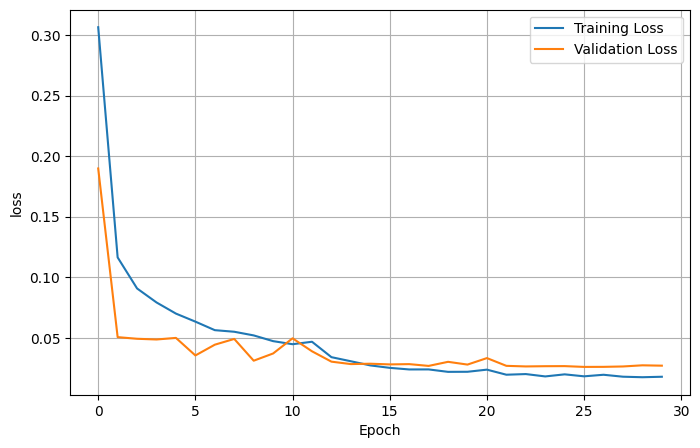

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()

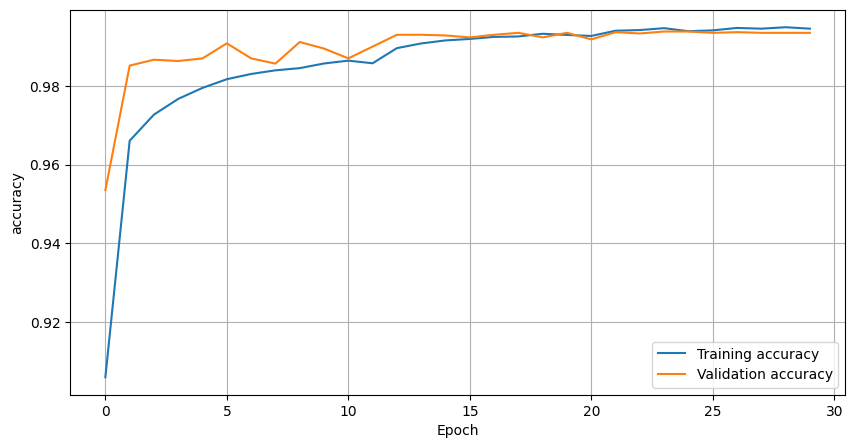

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.grid()
plt.legend()

In [ ]:
model.save('mnist_cnn_model.keras')

In [ ]:
def predict_image(image_path,model):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255
  img_array = img_array.reshape((1,28,28,1))

  prediction = model.predict(img_array)
  print(f"prediction : {prediction}")
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return predicted_class, confidence

In [ ]:
def load_model_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
  predicted_class, confidence = predict_image(image_path,loaded_model)
  print(f"Predicted Class : {predicted_class}")
  print(f"Confidence : {confidence}")

  img = Image.open(image_path).convert("L")
  plt.imshow(img, cmap='gray')
  plt.title(f"PREDICTED : {predicted_class} (Confidence : {confidence:.2f})")
  plt.axis('off')

In [ ]:
# from google.colab import files
# files.upload()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
prediction : [[2.40417634e-04 1.05054778e-05 4.64524888e-03 1.62280514e-04
  2.60366709e-03 8.43395756e-05 9.70707879e-06 1.16524556e-04
  9.91743743e-01 3.83510167e-04]]
Predicted Class : 8
Confidence : 0.9917437434196472


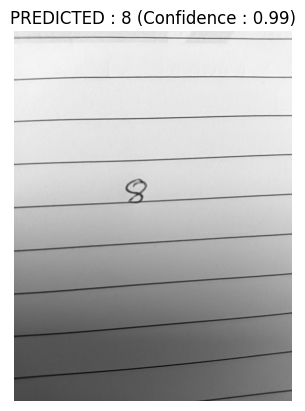

In [ ]:
image_path = "/content/IMG20240820192035.jpg"
load_model_and_predict(image_path)

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def gradio_predict(image):
  img = Image.fromarray(image).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255
  img_array = img_array.reshape((1,28,28,1))

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return f"Predicted Digit : {predicted_class}\nConfidence:{confidence:.2f}"

interface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Image(type='numpy',label="Upload your Digit"),
    outputs=gr.Textbox(label='Prediction Result'),
    title='MNIST DATA PREDICTOR',
    description='to preict values lables from 0-9 in single image',
    examples=None,

)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://09999cd4dea0dc4eb8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface.close()

Closing server running on port: 7861
